In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from pathlib import Path

In [2]:
print(pd.__version__)

0.25.0


### Check if your version is 0.25.0 some of the functionality may not work

In [4]:
data_folder = Path("occupancy_data")

In [5]:
! dir {data_folder}

 Volume in drive C is OSDisk
 Volume Serial Number is DE80-3D68

 Directory of C:\Users\hnambur\occupancy_data

10/17/2019  05:17 PM    <DIR>          .
10/17/2019  05:17 PM    <DIR>          ..
10/17/2019  05:17 PM    <DIR>          .ipynb_checkpoints
01/05/2016  03:51 PM           200,766 datatest.txt
01/05/2016  03:51 PM           699,664 datatest2.txt
10/17/2019  05:17 PM           596,681 datatraining.txt
               3 File(s)      1,497,111 bytes
               3 Dir(s)  26,353,242,112 bytes free


In [6]:
df = pd.read_csv(data_folder/"datatraining.txt",index_col = 1,parse_dates=True)

In [7]:
df.drop("index",inplace=True,axis=1)

In [8]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
"date""",,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [9]:
df.index # Observe the type of the index it is DatetimeIndex type

DatetimeIndex(['2015-02-04 17:51:00', '2015-02-04 17:51:59',
               '2015-02-04 17:53:00', '2015-02-04 17:54:00',
               '2015-02-04 17:55:00', '2015-02-04 17:55:59',
               '2015-02-04 17:57:00', '2015-02-04 17:57:59',
               '2015-02-04 17:58:59', '2015-02-04 18:00:00',
               ...
               '2015-02-10 09:23:59', '2015-02-10 09:24:59',
               '2015-02-10 09:26:00', '2015-02-10 09:27:00',
               '2015-02-10 09:28:00', '2015-02-10 09:29:00',
               '2015-02-10 09:29:59', '2015-02-10 09:30:59',
               '2015-02-10 09:32:00', '2015-02-10 09:33:00'],
              dtype='datetime64[ns]', name='date"', length=8143, freq=None)

In [10]:
print(df.index.year)  # Get the year
print(df.index.month) # Get the month
print(df.index.day)   # Get the day
print(df.index.weekday_name) # Get the weekday name

Int64Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            ...
            2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015],
           dtype='int64', name='date"', length=8143)
Int64Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
            ...
            2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           dtype='int64', name='date"', length=8143)
Int64Index([ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
            ...
            10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
           dtype='int64', name='date"', length=8143)
Index(['Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday',
       'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday',
       ...
       'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday'],
      dtype='object', name='date"', length=8143)


In [11]:
# Sample the data
df.sample(5) # same as before

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
"date""",,,,,,
2015-02-07 17:13:59,20.5500,20.89,0.0,431.00,0.003118,0
2015-02-05 16:05:00,22.4175,26.82,456.0,1063.25,0.004499,1
2015-02-08 23:09:00,19.5000,27.70,0.0,453.00,0.003879,0
2015-02-10 03:29:00,20.2000,32.79,0.0,447.00,0.004803,0
2015-02-06 22:59:00,20.0000,18.79,0.0,433.00,0.002709,0


In [17]:
df.loc['2015-02-05'] # select data available on the given date

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
"date""",,,,,,
2015-02-05 00:00:00,21.245000,25.2450,0.0,456.500000,0.003938,0
2015-02-05 00:01:00,21.245000,25.2450,0.0,458.500000,0.003938,0
2015-02-05 00:02:00,21.260000,25.2600,0.0,459.666667,0.003944,0
2015-02-05 00:03:00,21.245000,25.2450,0.0,464.000000,0.003938,0
2015-02-05 00:04:00,21.245000,25.2000,0.0,465.000000,0.003931,0
2015-02-05 00:04:59,21.290000,25.2000,0.0,461.000000,0.003942,0
2015-02-05 00:06:00,21.245000,25.2000,0.0,458.500000,0.003931,0
2015-02-05 00:07:00,21.290000,25.2000,0.0,459.000000,0.003942,0
2015-02-05 00:08:00,21.290000,25.2000,0.0,451.000000,0.003942,0


In [18]:
df.loc['2015-02-05':"2015-10-02"] # select the data between given dates

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
"date""",,,,,,
2015-02-05 00:00:00,21.245000,25.245000,0.0,456.500000,0.003938,0
2015-02-05 00:01:00,21.245000,25.245000,0.0,458.500000,0.003938,0
2015-02-05 00:02:00,21.260000,25.260000,0.0,459.666667,0.003944,0
2015-02-05 00:03:00,21.245000,25.245000,0.0,464.000000,0.003938,0
2015-02-05 00:04:00,21.245000,25.200000,0.0,465.000000,0.003931,0
2015-02-05 00:04:59,21.290000,25.200000,0.0,461.000000,0.003942,0
2015-02-05 00:06:00,21.245000,25.200000,0.0,458.500000,0.003931,0
2015-02-05 00:07:00,21.290000,25.200000,0.0,459.000000,0.003942,0
2015-02-05 00:08:00,21.290000,25.200000,0.0,451.000000,0.003942,0


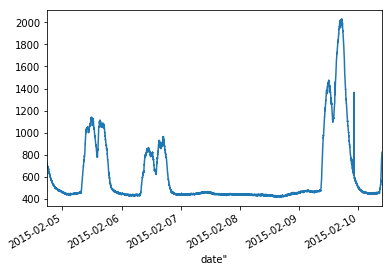

In [19]:
# Lets see how the Co2 changes with time for whole data
df['CO2'].plot()

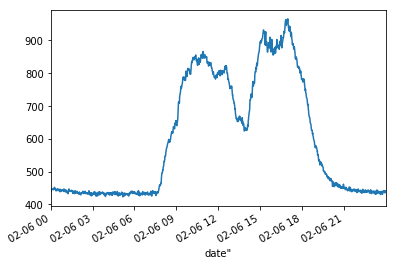

In [21]:
# plot only for a day
df.loc['2015-02-6']['CO2'].plot()

In [26]:
# Lets add the weekday name to data frame and see the trend day wise
df['WeekdayName'] = df.index.weekday_name

C:\Users\hnambur\Anaconda\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


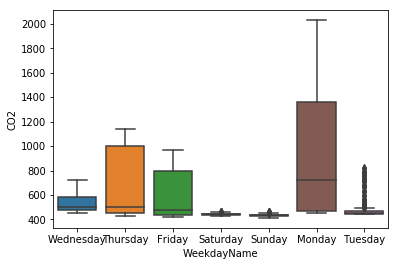

In [27]:
sns.boxplot(data=df, x='WeekdayName', y='CO2');

In [28]:
daily_mean = df['CO2'].resample('D').mean()

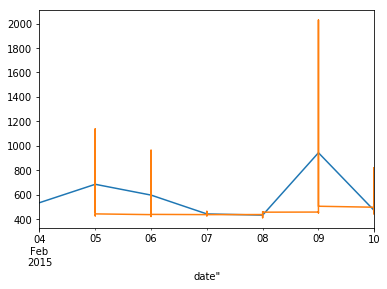

In [51]:
ax = daily_mean['2015-02'].plot()
df.loc['2015-02-05':"2015-02-10"]['CO2'].plot(ax = ax)

### Rolling mean can be used to identify the trends in the data

In [94]:
df_1d = df.rolling(60*12).mean() # Average data for every 12 hours
df_2d = df.rolling(60*6).mean() # every hour

In [81]:
df_1d.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
"date""",,,,,,
2015-02-04 17:51:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-04 17:51:59,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-04 17:53:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-04 17:54:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-04 17:55:00,NaN,NaN,NaN,NaN,NaN,NaN


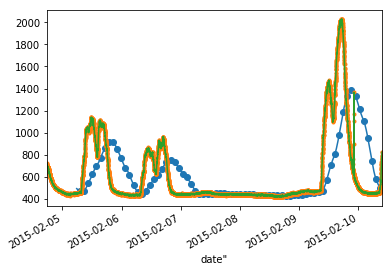

In [100]:
ax = df_1d['CO2'].plot(marker='o',markevery=100)
df['CO2'].plot(ax=ax,marker='.')
df['CO2'].plot(ax=ax)

## One of the best resources https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html